---
#### **Supervised Learning**
---

Existem várias estratégias/algoritmos para criação de modelos supervisionados, inclusive sendo criadas e reformadas constantemente ao longo dos anos para aperfeiçoamento, sendo as mais populares:

*  **K-Nearest Neighbors:** O KNN classifica cada dado analisando a distância entre um número K de "vizinhos" (dados próximos) e incluindo na classe dominante dos vizinhos. Pode-se ou não considerar a distância do vizinho como uma métrica.

  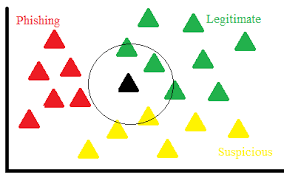

*  **Naive Bayes:** Assume que os Features não possuem relação entre sí e faz uma classificação uma por uma resultando na probabilidade da classe que a maioria das instâncias aponta. Apesar de simples, não é funcional em casos que há relação dos atributos.

*  **Support Vector Machine:** Nem sempre uma linha/vetor linear separa bem os dados, assim são utilizados múltiplos vetores gerados com os dados em um hiperplano (dimensão maior) para que ocorra a hiperlinearização e a classificação dos dados com o critério de similaridade (kernel trick). Sua otimização matemática considera apenas dados importantes que geram os vetores, assim consegue ser eficiente para grande conjuntos de dados.

  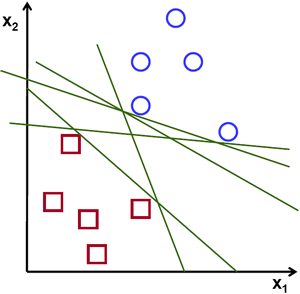

*  **Decision Tree:** É um procedimento lógico que utiliza uma hierarquia dos Features em que quanto mais alta forem as leafs/folhas/nodes mais importantes/variantes serão, sendo as últimas já consideradas os Targets. Entre elas é utilizado um algoritmo de partição para determinar o "caminho". Extremamente simples e utiliza pouco processamento. Também pode ser chamada de Regras de Decisão com estruturas de seleção lógica.

*  **Random Florest:** Utiliza várias Decisions Trees a partir de amostras de dados coletadas aleatoriamente e obtem-se a moda/média do resultado de cada árvore da floresta. Algumas árvores podem ser descartadas se houver um teste de eficácia mínima. Mais eficiente, porém mais custoso computacionalmente.

  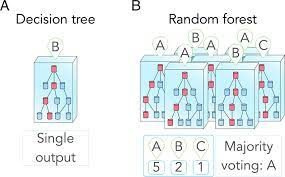

* **Artificial Neural Network**

---
##### **Classification**
---

Em Classificação o Target é nominal ou categórico. Ou seja, o Target é um conjunto de rótulos que são classificados a partir dos Features. Com uma base de dados o algoritmo usará estratégias para determinar a relação do X com y, assim poderá ser treinado a partir de novos dados e prever um Target para Features informados.

É possível criar uma **Confusion Matrix (Matriz de Confusão)** com os dados de teste para avaliar o modelo, basicamente as linhas são as classes obtidas e as colunas são as classes verdadeiras, obtendo então Verdadeiros/Falsos Positivos e Negativos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(matrix, target_name, targets):
  plt.figure(figsize=(8,6), dpi=100)
  ax = sns.heatmap(matrix, annot=True, fmt='d')
  ax.set_xlabel("Actual " + target_name)
  ax.xaxis.set_ticklabels(targets)
  ax.set_ylabel("Predict " + target_name)
  ax.yaxis.set_ticklabels(targets)
  plt.show()

Para dados que não podem ser tratados, é utilizado **Transformations**.

Os algoritmos de machine learning utilizam, em geral, apenas valores numericos, assim os dados categóricos precisam passar por uma codificação:
*  **Label Enconding:** Rotula as categorias do atributo como um numeral, se há ordem de grandeza a rotulação deve ser coincidente.

*  **One-Hot Enconding:** Cria uma tabela verdade das categorias do atributo. Não é recomendável utilizar quando há muitas categorias ou se elas obedecem uma ordem de grandeza.

A escala dos valores numericos pode desbalancear como o modelo enxerga o dado. Por exemplo, se houver atributos de preço e peso de um carro, o modelo pode interpretar que uma variação de preço de RS 50.000 para RS 55.000 tem maior grau de significância do que uma diferença de peso de 1.24 para 2.05 toneladas, por conta da variação numerica não ser proporcional. Dessa maneira, é recomendável redimensionar os atributos:
*  **Normalização:** Transforma em uma escala entre zero e um, encontrando o menor e maior valor do atributo para subtrair o valor do dado pelo mínimo e depois dividir pela diferença entre máximo e mínimo. Afeta outliers e precisa ser positivo.

*  **Padronização Normal Z:** Padroniza os valores com a média e desvio e substitui pelo Z-Score correspondente. Afeta outliers e pode ser negativo.

Para exemplo prático de Classificação, é utilizado uma tabela de previsão de chuva com o Target booleano.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv")
dataset.pop("Date")
dataset.pop("Location")
dataset.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Tendo a base de dados, é necessário utilizar as transformadas para mudar os dados em valores numericos. Mapeia-se os valores booleanos em 1 e 0 e os utiliza-se o One-Hot Encoder para os valores categóricos, além de preencher os valores vazios.

In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms, OneHotEncoderTransforms, TransformMapValues

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [TransformMapValues('RainTomorrow', {'Yes': 1, 'No': 0}),
                                                  TransformMapValues('RainToday', {'Yes': 1, 'No': 0}),
                                                  OneHotEncoderTransforms(['WindGustDir', 'WindDir9am', 'WindDir3pm']),
                                                  AutoFillNATransforms()])

dataset_transformed.ins_transform()
dataset_transformed.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = dataset_transformed.drop('RainTomorrow', axis=1), dataset_transformed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

###### **K-Nearest Neighbors**

ACCURACY: 0.8238%


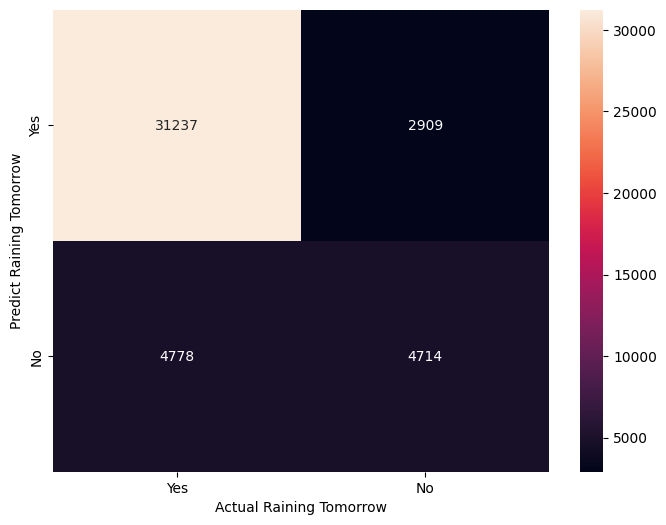

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Testing
predicts = knn.predict(X_test)

# Results
acc_knn = accuracy_score(y_test, predicts)
print(f'ACCURACY: {acc_knn:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

###### **Naive Bayes**

ACCURACY: 73.47%


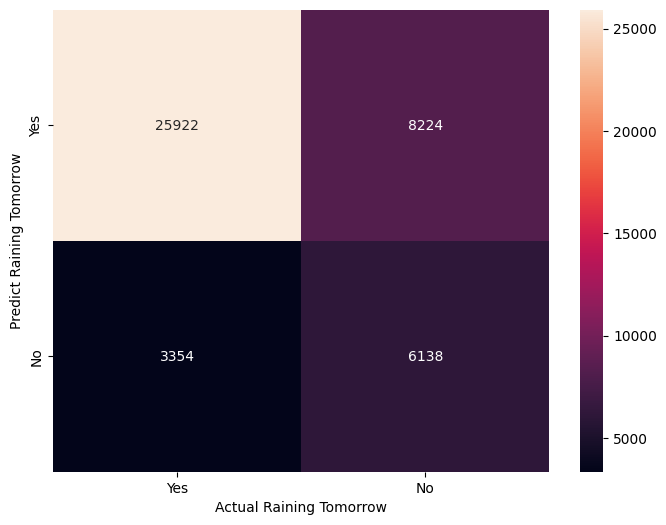

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Testing
predicts = naive_bayes.predict(X_test)

# Results
acc_nb = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_nb:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

###### **Support Vector Machine**

ACCURACY: 83.67%


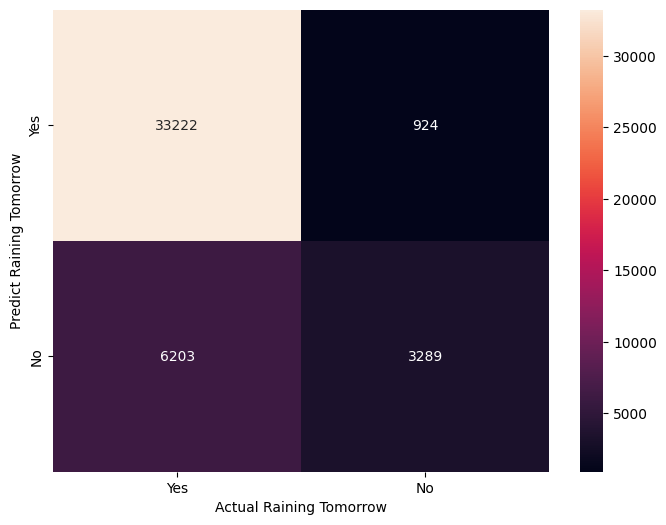

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
svm = SVC()
svm.fit(X_train, y_train)

# Testing
predicts = svm.predict(X_test)

# Results
acc_svm = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_svm:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

###### **Decision Tree**

ACCURACY: 78.52%


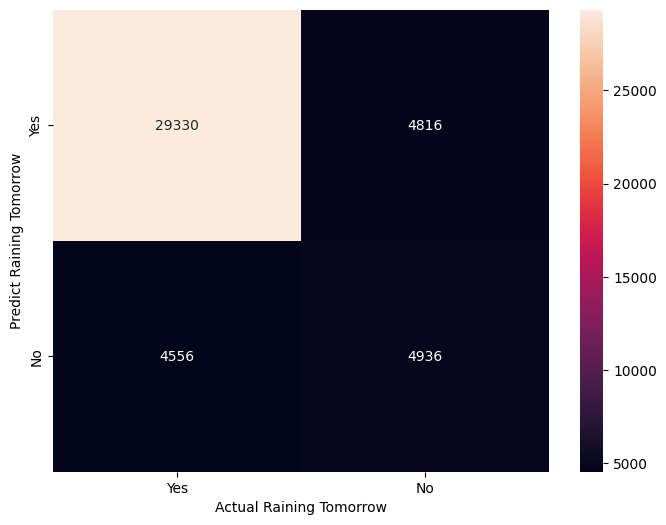

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Testing
predicts = tree.predict(X_test)

# Results
acc_tree = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_tree:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

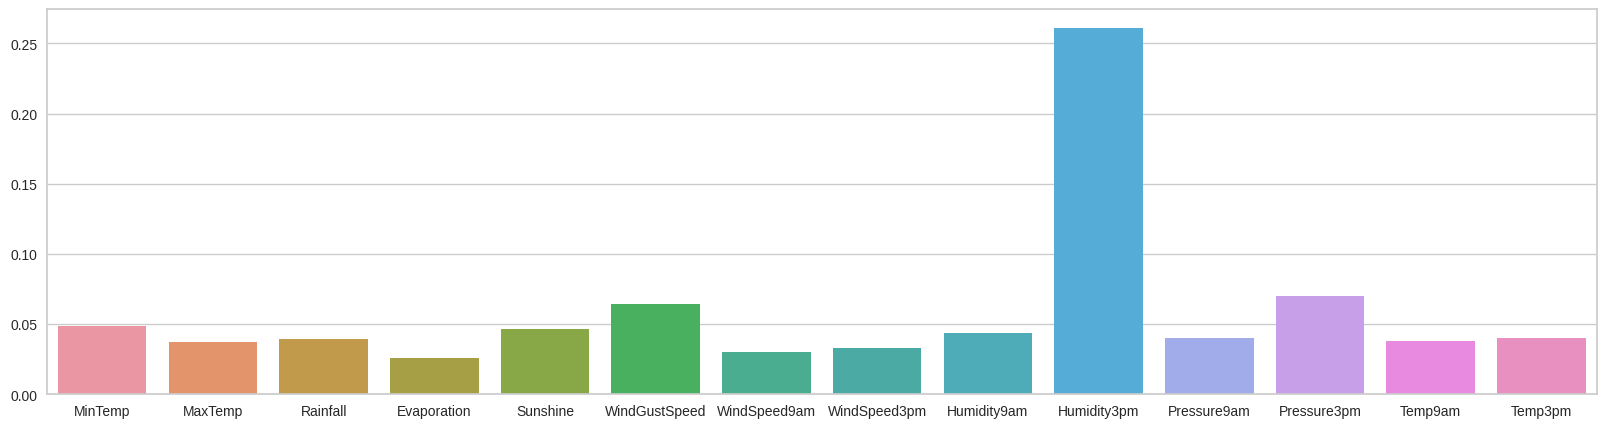

In [ ]:
features = dict(zip(X.columns, tree.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.02:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

###### **Random Florest**

ACCURACY: 85.57%


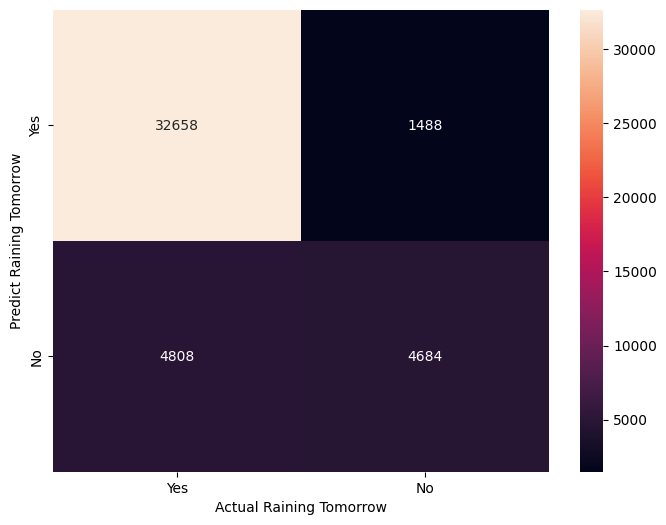

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

# Testing
predicts = forest.predict(X_test)

# Results
acc_forest = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_forest:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

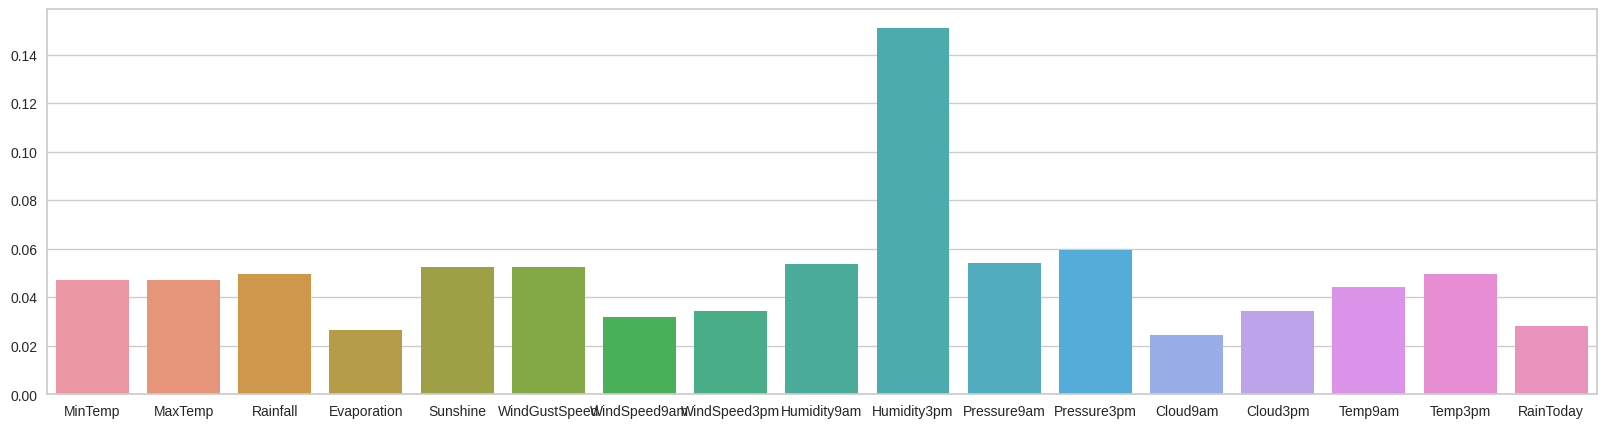

In [ ]:
features = dict(zip(X.columns, forest.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.02:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

###### **Artificial Neural Network**

---
##### **Regression**
---

Em Regressão o Target é numérico. Ou seja, o Target é um intervalo de números que são classificados a partir dos Features. Com uma base de dados o algoritmo usará estratégias para determinar a relação do X com y, assim poderá ser treinado a partir de novos dados e prever uma margem numérica do Target para Features informados.

Utilizando um dataset de expectativa de vida, é possível criar um modelo de regressão, já que a expectativa de vida é um valor numerico. Basta eliminar algumas colunas desnecessárias e exluir dados inconclusivos para tratamento.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv")
dataset.replace("Unknown", np.nan, inplace=True)
dataset = dataset.loc[dataset["Year"] == 2015]
dataset.pop("Country")
dataset.pop("Continent")
dataset.pop("Status")
dataset.pop("Year")
dataset.head(5)

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
16,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
32,75.6,19,21,0.00,0.000000,95.0,63,59.5,24,95.0,NaN,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
48,52.4,335,66,0.00,0.000000,64.0,118,23.3,98,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
64,76.4,13,0,0.00,0.000000,99.0,0,47.7,0,86.0,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [AutoFillNATransforms()])

dataset_transformed.ins_transform()
dataset_transformed.head(5)

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
16,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
32,75.6,19,21,0.00,0.000000,95.0,63,59.5,24,95.0,7.08,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
48,52.4,335,66,0.00,0.000000,64.0,118,23.3,98,7.0,7.08,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
64,76.4,13,0,0.00,0.000000,99.0,0,47.7,0,86.0,7.08,99,0.2,13566.954100,11247,3.3,3.3,0.784,13.9


Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = dataset_transformed.drop("Life_expectancy ", axis=1), dataset_transformed["Life_expectancy "]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###### **K-Nearest Neighbors**

 MAX ERROR: 5.767
 MEAN ABS ERROR: 2.209
 EXPLAINED VARIANCE: 0.9029


<Axes: xlabel='Life_expectancy '>

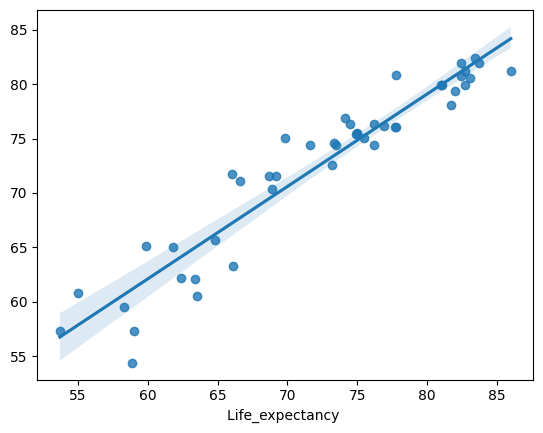

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

# Testing
predicts = knn.predict(X_test)

# Results
max_error_knn = max_error(y_test, predicts)
error_knn = mean_absolute_error(y_test, predicts)
ex_var_knn = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_knn:.4}\n MEAN ABS ERROR: {error_knn:.4}\n EXPLAINED VARIANCE: {ex_var_knn:.4}')
sns.regplot(x=y_test, y=predicts)

###### **Bayesian Ridge**

Naive Bayes não funciona bem para regressão, mas há sua versão para esses casos, chama Bayesian Ridge.

 MAX ERROR: 11.24
 MEAN ABS ERROR: 2.085
 EXPLAINED VARIANCE: 0.9005


<Axes: xlabel='Life_expectancy '>

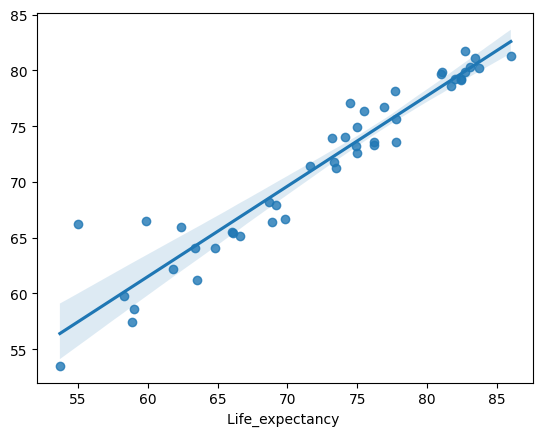

In [ ]:
from sklearn import linear_model
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)

# Testing
predicts = br.predict(X_test)

# Results
max_error_br = max_error(y_test, predicts)
error_br = mean_absolute_error(y_test, predicts)
ex_var_br = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_br:.4}\n MEAN ABS ERROR: {error_br:.4}\n EXPLAINED VARIANCE: {ex_var_br:.4}')
sns.regplot(x=y_test, y=predicts)

###### **Support Vector Machine**

 MAX ERROR: 14.69
 MEAN ABS ERROR: 3.946
 EXPLAINED VARIANCE: 0.6472


<Axes: xlabel='Life_expectancy '>

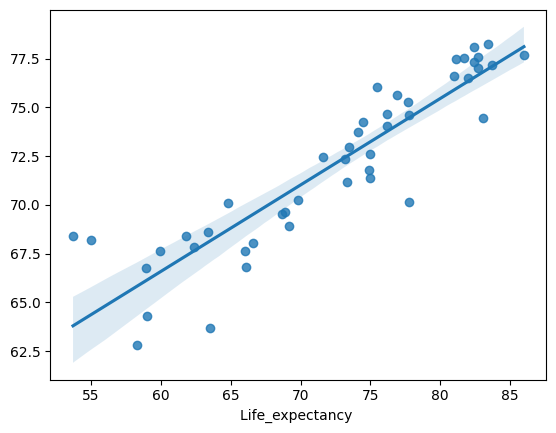

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
svm = SVR()
svm.fit(X_train, y_train)

# Testing
predicts = svm.predict(X_test)

# Results
max_error_svm = max_error(y_test, predicts)
error_svm = mean_absolute_error(y_test, predicts)
ex_var_svm = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_svm:.4}\n MEAN ABS ERROR: {error_svm:.4}\n EXPLAINED VARIANCE: {ex_var_svm:.4}')
sns.regplot(x=y_test, y=predicts)

###### **Decision Tree**

 MAX ERROR: 10.0
 MEAN ABS ERROR: 2.087
 EXPLAINED VARIANCE: 0.8931


<Axes: xlabel='Life_expectancy '>

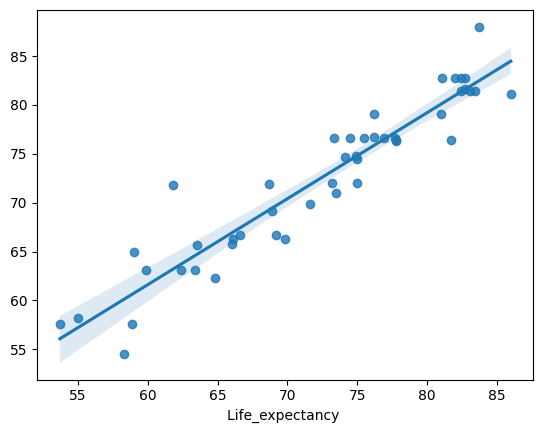

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Testing
predicts = tree.predict(X_test)

# Results
max_error_tree = max_error(y_test, predicts)
error_tree = mean_absolute_error(y_test, predicts)
ex_var_tree = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_tree:.4}\n MEAN ABS ERROR: {error_tree:.4}\n EXPLAINED VARIANCE: {ex_var_tree:.4}')
sns.regplot(x=y_test, y=predicts)

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

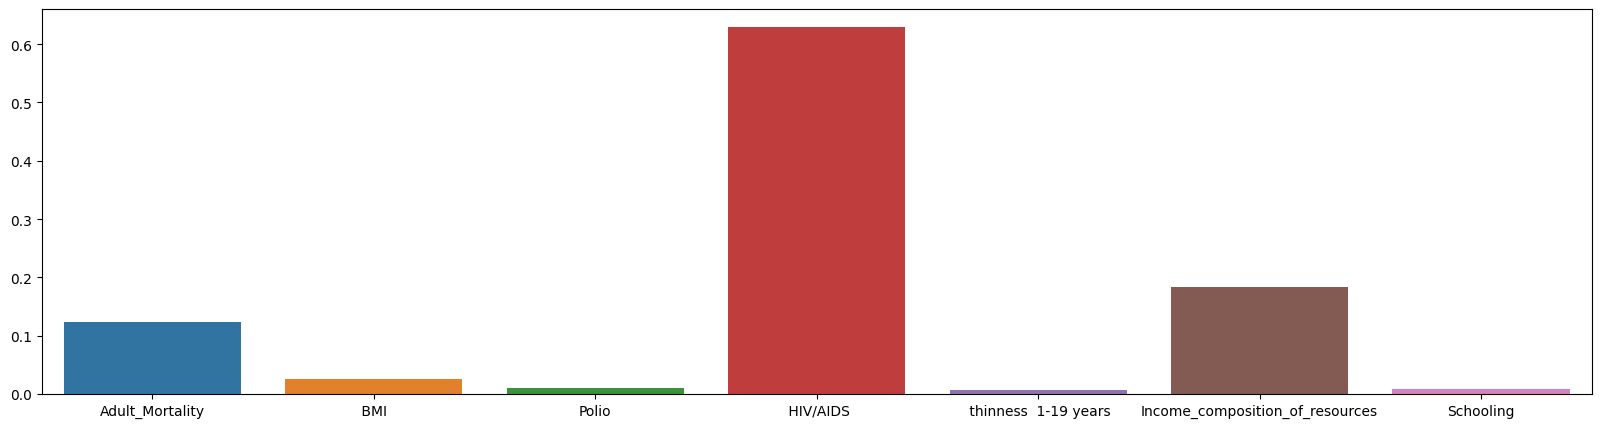

In [ ]:
features = dict(zip(X.columns, tree.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.005:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

<Axes: xlabel=' HIV/AIDS', ylabel='Life_expectancy '>

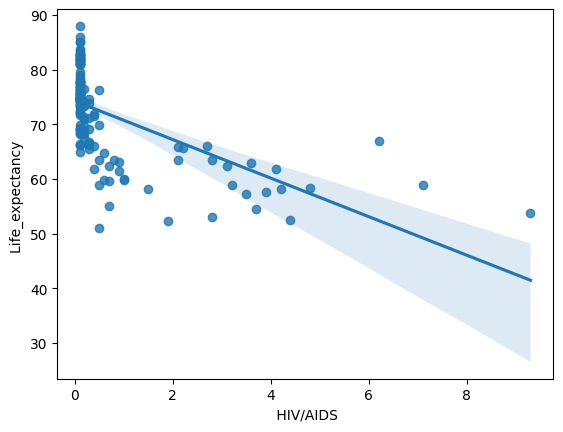

In [ ]:
sns.regplot(x=X[" HIV/AIDS"], y=y)

###### **Random Florest**

 MAX ERROR: 9.583
 MEAN ABS ERROR: 1.813
 EXPLAINED VARIANCE: 0.9091


<Axes: xlabel='Life_expectancy '>

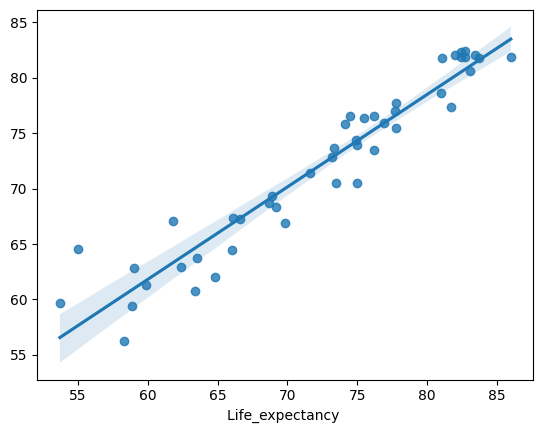

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score
# Training
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Testing
predicts = forest.predict(X_test)

# Results
max_error_forest = max_error(y_test, predicts)
error_forest = mean_absolute_error(y_test, predicts)
ex_var_forest = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_forest:.4}\n MEAN ABS ERROR: {error_forest:.4}\n EXPLAINED VARIANCE: {ex_var_forest:.4}')
sns.regplot(x=y_test, y=predicts)

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

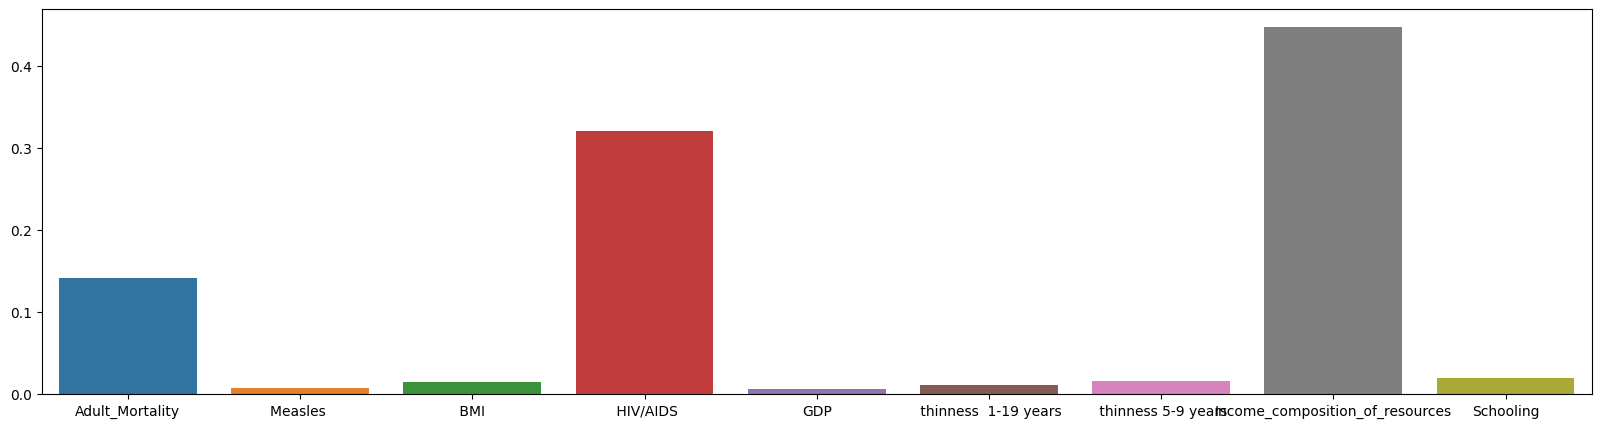

In [ ]:
features = dict(zip(X.columns, forest.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.005:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

<Axes: xlabel='Income_composition_of_resources', ylabel='Life_expectancy '>

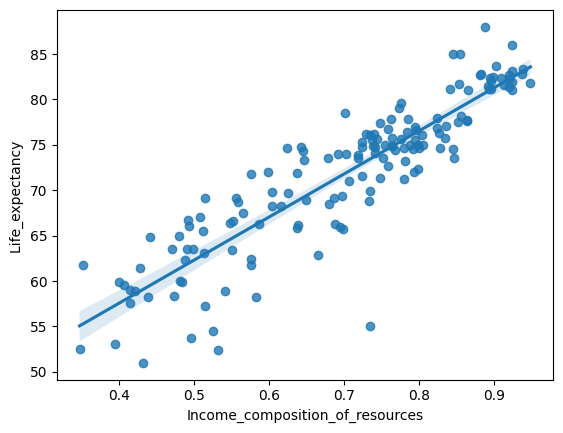

In [ ]:
sns.regplot(x=X["Income_composition_of_resources"], y=y)

###### **Artificial Neural Network**

---
#### **Unsupervised Learning**
---

No Aprendizado Não Supervisionado, não há classes propriamente definidas. O Target é a relação interna entre os Features. Não há uma determinação genérica sobre os casos não supervisionados e alguns podem até ser semi-supervisionados, mas as duas mais comuns são o Clustering (Agrupamento) e Reinforcement (Associação).

---
##### **Clustering**
---

Em Agrupamento o Target é agrupado em Clusters/Grupos. Ou seja, o Target é um conjunto de clusters definidos pelos Features que serão agrupados a partir de suas características. Com uma base de dados o algoritmo usará estratégias de agrupamento para determinar os clusters, assim cada novo dado inserido no modelo, os grupos podem variar com o aprendizado ou prever qual será o Target Grupal a partir de Features informados. O Agrupamento pode ser:
*  **Agrupamento Completo:** Grupos separados, cada elemento só possui um.
*  **Agrupamento Parcial:** Há união entre os grupos, cada elemento pode ter


*  **Agrupamento Não-Ruidoso**: Agrupa todas as instâncias.
*  **Agrupamento Ruidoso**: Possui instâncias sem grupos, consideradas ruídos.

O modelo determina uma porcentagem do quão aquele dado pertence aos grupos, sendo assim, os modelos podem ser:
* **Modelo Direto**: A instância é inserida no grupo com maior probabilidade calculada.
* **Modelo Difuso**: A instância pertence a todos os grupos com uma taxa de integração baseada na probabilidade calculada.
* **Modelo Hierárquico**: Os grupos podem ter subgrupos para aumentar o agrupamento das instâncias. Geralmente é representado por um dendograma e cada subgrupo tem sua respectiva altura/profundidade. Podendo ser bottom-up (Aglomerativo) ou top-down (Divisivel)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(matrix, target_name, actual_groups, predict_groups):
  plt.figure(figsize=(8,6), dpi=100)
  ax = sns.heatmap(matrix, annot=True, fmt='d')
  ax.set_xlabel("Actual " + target_name)
  ax.xaxis.set_ticklabels(actual_groups)
  ax.set_ylabel("Predict " + target_name)
  ax.yaxis.set_ticklabels(predict_groups)
  plt.show()

Podemos usar como exemplo um dataset com as estatísticas de três tipos de flor íris, sendo elas Setosa, Versicolor e Virginica. Utiliza-se, então, o modelo de agrupamento para tentar prever o tipo com base nos outros atributos/Features.

In [ ]:
dataset = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

real_clusters = np.unique(dataset["variety"], return_counts=True)
num_clusters = len(real_clusters[0])

dataset.replace("Setosa", 0, inplace=True)
dataset.replace("Versicolor", 1, inplace=True)
dataset.replace("Virginica", 2, inplace=True)

real_clusters

(array(['Setosa', 'Versicolor', 'Virginica'], dtype=object),
 array([50, 50, 50]))

Há diversas estrategias/técnicas para modelar os agrupamentos, as mais populares são:

###### **Natural Language Processing**

###### **Deep Learning**

###### **K-Means, K-Medoid and C-Means**

É uma técnica de agrupamento simples, não-ruidoso e baseada em protótipos que define um ponto para cada grupo que determina o agrupamento por menor distância euclidiana. Então, é extremamente dependente desse Ponto Comparativo para o agrupamento e tem isso como dificuldade em casos que há dificuldade de centrificação, além de precisar que a quantidade de grupos seja informada e que não tenha ruído nos dados.
*  **Ponto Comparativo do K-Means:** É a centróide da figura formada pela média de um conjunto de pontos entre os dados.
*  **Ponto Comparativo do K-Medoid:** É o dado mais representativo do conjunto de dados. Ou seja, em vez de escolher médias entre os dados, utiliza o dado como ponto, dando mais interpretabilidade.

In [ ]:
from sklearn.cluster import KMeans

cluster_kmeans = KMeans(n_clusters = num_clusters)
cluster_kmeans.fit(dataset.drop("variety", axis=1))

predicts_kmeans = cluster_kmeans.labels_
pred_clusters = np.unique(predicts_kmeans, return_counts=True)

print(f'\nREAL CLUSTERS: {real_clusters}')
print(f'PREDICT CLUSTERS: {pred_clusters}\n')


REAL CLUSTERS: (array(['Setosa', 'Versicolor', 'Virginica'], dtype=object), array([50, 50, 50]))
PREDICT CLUSTERS: (array([0, 1, 2], dtype=int32), array([62, 50, 38]))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


É possível analisar os resultados usando uma Matriz de Confusão:

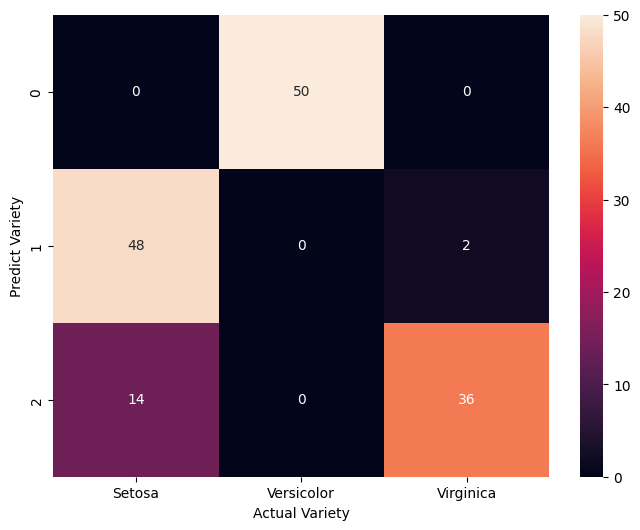

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dataset["variety"], predicts_kmeans)
plot_confusion_matrix(cm, "Variety", real_clusters[0], pred_clusters[0])

o **K-Medoid** é semelhante, porém utiliza as medoides e não centroides.

In [ ]:
!pip install -q pyclustering

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids

centers = [1, 30, 50]
cluster_kmedoid = kmedoids(dataset.drop("variety", axis=1), centers)
cluster_kmedoid.process()
predicts_kmedoids = cluster_kmedoid.get_clusters()

O K-Means é um modelo direto e sua **versão difusa é chamada de C-Means**.

In [ ]:
!pip install -q scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from skfuzzy import cmeans

ptg_cmeans = cmeans(data=dataset.drop("variety", axis=1).T, c=num_clusters, m=2, error=0.005, maxiter=1000, init=None)

for i in centers:
  print(f'ACCURACY ROW {i}: {100*ptg_cmeans[1][0][i]:.4}%, {100*ptg_cmeans[1][1][i]:.4}%, {100*ptg_cmeans[1][2][i]:.4}%')

ACCURACY ROW 1: 1.666%, 0.7502%, 97.58%
ACCURACY ROW 30: 1.481%, 0.6478%, 97.87%
ACCURACY ROW 50: 45.36%, 50.18%, 4.457%


###### **Agglomerative/Hierarchical Clustering**

###### **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

É uma técnica de agrupamento ruidosa baseada na densidade espacial do conjunto de dados. além disso, o número de grupos é definido automaticamente sem precisar ser informado. Ou seja, em vez de comparar distâncias do dado com os pontos comparativos como o K-Means, compara-se as menores distâncias entre os próprios dados agrupamando os vizinhos próximos. Os dados outliers, poucos vizinhos, ou seja, com baixa densidade, são considerados ruídos e ficam sem grupo. Então, há dificuldade em casos com grande variação de densidade por conta da formação de pequenos grupos desnecessários ou excesso de ruído. Além disso, precisa da informação do Raio de Densidade e geralmente um número mínimo para considerar uma densidade um grupo.

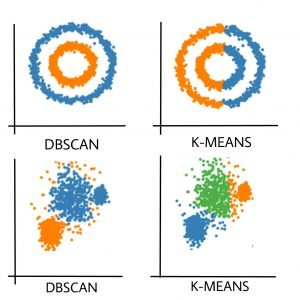

In [ ]:
from sklearn.cluster import DBSCAN

cluster_dbscan = DBSCAN(eps=0.7, min_samples=20).fit(dataset.drop("variety", axis=1))
predicts_dbscan = cluster_dbscan.labels_ + 1
pred_clusters = np.unique(predicts_dbscan, return_counts=True)
pred_clusters

(array([0, 1, 2]), array([16, 49, 85]))

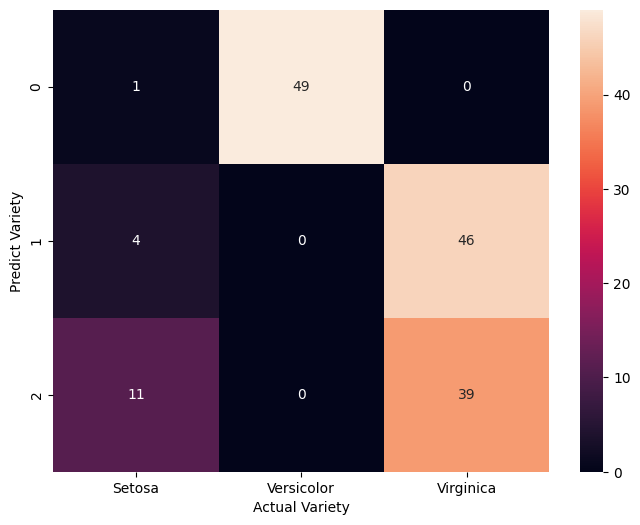

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset["variety"], predicts_dbscan)
plot_confusion_matrix(cm, "Variety", real_clusters[0], pred_clusters[0])

É extremamente parecido com o DBSCAN por conter quase integralmente seu funcionamento no agrupamento baseado em densidade espacial, mas é adicionado fatores que corrigem o grande problema do DBSCAN que é sua dificuldade em trabalhar com grande variação de densidade nos dados. Dessa maneira o OPTICS calcula uma distância entre o dado e o um ponto comparativo da densidade espacial para conseguir agrupar outliers ou pequenas densidades. Ou seja, é uma mistura do DBSCAN com K-Means e por conta disso exige mais processamento e uma boa análise na escolha do numero mínimo do agrupamento.

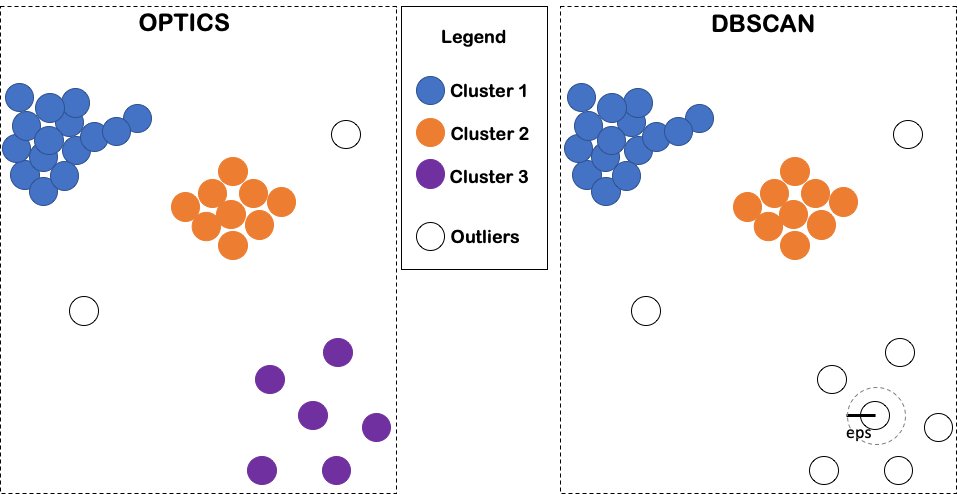

In [ ]:
from sklearn.cluster import OPTICS

cluster_optics = OPTICS(min_samples=13).fit(dataset.drop("variety", axis=1))
predicts_optics = cluster_optics.labels_ + 1
pred_clusters = np.unique(predicts_optics, return_counts=True)
pred_clusters

(array([0, 1, 2]), array([ 28,  22, 100]))

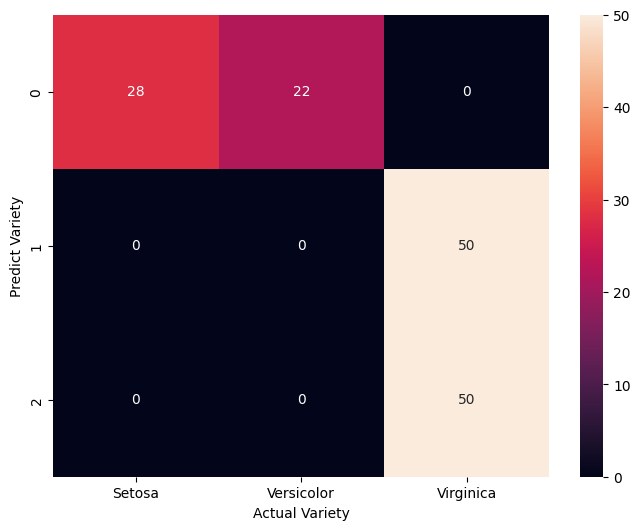

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset["variety"], predicts_optics)
plot_confusion_matrix(cm, "Variety", real_clusters[0], pred_clusters[0])

---
##### **Reinforcement**
---

Em Associação não há uma seperação estrutural dos dados, o Target é a relação dos Features. Ou seja, a partir de um atributo, é determinado a relação com os outros atributos. Com uma base de dados o algoritmo usará estratégias para obter as relações, assim com um Feature informado, é possível determinar o grau de relação com os outros Features e aperfeiçoar essa associação com novos dados inseridos. Geralmente a relação é simbolizada como (atributo 1) -> (atributo 2) que é a relação de um Item com outro Item Relacionado.
*  **Frequência:** Porcentagem de ocorrências que um item ou conjunto de itens aparecem. É a quantidade de aparições por transação dividido pelo total.
*  **Suporte:** Frequência da correspondência da relação. É a frequência de ocorrências do Item e seu Relacionado.
*  **Confiança:** Nível de relação ou proporcionalidade de um feature com outro. É a quantidade de transações contendo o Item e seu Relacionado dividido pela quantidade de transações que o Item aparece sozinho ou não.
*  **Lift:** O quanto um feature é impactado com a ocorrência de outro. É o Suporte calculado dividido pela multiplicação da frequência do Item com a frequência do Item Relacionado.

 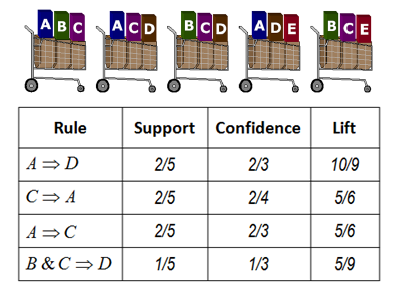

 Ou seja, o Suporte é a taxa de impacto da Confiança no todo, enquanto o Lift é um valor escalar de medição da divisão da Confiança pela Frequência do Item Relacionado. Usando um exemplo de compra de um conjunto de produtos em um supermercado, a maioria das pessoas sempre compra água, então haverá muitas relações de outros produtos com esse, tendo alta Confiança e Suporte, mas o Lift não será tão alto por ser dividido pela quantidade de compras da água. Como o foco da análise nesse exemplo é aumentar a venda de produtos relacionados, as relações não interessantes podem ser descartadas pelo Lift.

Como exemplo clássico, utilizar um dataset de Market Basket. Por padronização é recomendado transformar o dataset com as instâncias sendo compras e os atributos como os itens comprados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/MohdTalib0/Market-Basket-Analysis-in-Python-using-Apriori-Algorithm/main/Groceries_dataset%5B1%5D.csv")
items_name = np.unique(dataset["itemDescription"])
dataset = dataset.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))
transactions = dataset.values.tolist()
dataset.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
1001           02-05-2015                                  [frankfurter, curd]
               07-02-2014                    [sausage, whole milk, rolls/buns]
               12-12-2014                                   [whole milk, soda]
               14-04-2015                                  [beef, white bread]
               20-01-2015              [frankfurter, soda, whipped/sour cream]
Name: itemDescription, dtype: object

Há diversas estrategias/técnicas para modelar os associação, as mais populares são:

###### **Apriori**

O Apriori identifica frequência dos itens criando conjuntos de repetições e fornece uma mineração das regras de associação de um dataset. A função da biblioteca apyori recebe uma lista-matriz e encontra as relações. No caso do Market Basket é criado transactions para receber cada linha como uma compra e produtos como colunas. O Apriori é também muito utilizado em Bancos de Dados Relacionais e em Bussiness Inteligence. Pode exigir muito processamento em casos de grandes datasets com diversos atributos.

In [ ]:
!pip install -q apyori

  Preparing metadata (setup.py) ... done


In [ ]:
from apyori import apriori

transactions_apriori = transactions
rules_apriori = apriori(transactions_apriori, min_support=0.00035, min_confidence=0.15, min_lift=3, min_lenght=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


O retorno da função apriori do apyori é bem complexo com muitas informações, é recomendado utilizar uma função para transformar em uma lista ou dataframe mais compreensível:

In [ ]:
def apriori_to_dataframe(rules):
  item, related_item, support, confidence, lift = [], [], [], [], []
  for rule in list(rules):
    item.append(tuple(rule[2][0][0])[0])
    related_item.append(tuple(rule[2][0][1])[0])
    support.append(rule[1])
    confidence.append(rule[2][0][2])
    lift.append(rule[2][0][3])

  cols = ['Item', 'Related Item', 'Support', 'Confidence', 'Lift']
  return pd.DataFrame(list(zip(item, related_item, support, confidence, lift)), columns=cols)

result = apriori_to_dataframe(rules_apriori).sort_values("Lift", ascending=False)
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Related Item,Support,Confidence,Lift
0,brown bread,canned beer,0.000401,0.222222,4.736626
2,soda,yogurt,0.000401,0.400000,4.657743
3,citrus fruit,yogurt,0.000401,0.300000,3.493307
1,hygiene articles,whole milk,0.000401,0.545455,3.453930
4,curd,sausage,0.000468,0.205882,3.411537
5,yogurt,sausage,0.000401,0.187500,3.106935
6,pork,yogurt,0.000401,0.260870,3.037659


###### **FP-Growth (Frequent Pattern-Growth)**

O Frequent Pattern identifica as maiores frequências e relações utilizando árvores de decisão e suas sobreposições para encontrar regras de associação mais relevantes de um dataset. O FP-Growth é uma maneira que utiliza menos processamento que o Apriori sem perder muita eficiência.

A função fpgrowth do mlxtend precisa receber um dataframe booleano com as colunas, linhas e dados sendo respectivamente os itens, transações e um booleano se há ou não a presença daquela item na transação.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

transactions_fpg =  pd.DataFrame([[0 for col in range(len(items_name))] for row in range(len(transactions))], columns=items_name)
for instance, i in zip(transactions, range(len(transactions))):
  for item in instance:
    transactions_fpg[item][i] = 1

transactions_fpg.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ou utilizar a própria transformada do mlxtend para transformar uma lista matriz nesse tipo de dataframe booleano:

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder().fit(transactions)
transactions_fpg = pd.DataFrame(te.transform(transactions), columns=te.columns_)
transactions_fpg.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


O FP-Growth fornece também uma relação de mais de um Item com o seu Relacional. No caso, um conjunto de dois ou mais itens antecedentes para um item consequente, além de também fornecer os de apenas um item.

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules_fpg = fpgrowth(transactions_fpg, min_support=0.00035, use_colnames=True)
rules_fpg = association_rules(rules_fpg, metric="lift", min_threshold=1)
rules_fpg = rules_fpg.loc[(rules_fpg["lift"] > 3) & (rules_fpg["confidence"] > 0.15)]
rules_fpg.sort_values("lift", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
499,"(hygiene articles, whole milk)",(canned beer),0.001738,0.046916,0.000401,0.230769,4.918803,0.000319,1.239010,0.798085
3035,"(brown bread, sausage)",(canned beer),0.001804,0.046916,0.000401,0.222222,4.736626,0.000316,1.225394,0.790305
4154,"(soda, chewing gum)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092
3036,"(canned beer, sausage)",(brown bread),0.002473,0.037626,0.000401,0.162162,4.309827,0.000308,1.148640,0.769876
3907,"(citrus fruit, pork)",(yogurt),0.001337,0.085879,0.000401,0.300000,3.493307,0.000286,1.305888,0.714694
498,"(hygiene articles, canned beer)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997
690,"(curd, yogurt)",(sausage),0.002272,0.060349,0.000468,0.205882,3.411537,0.000331,1.183264,0.708487
1858,"(yogurt, margarine)",(sausage),0.002139,0.060349,0.000401,0.187500,3.106935,0.000272,1.156494,0.679593
3848,"(pork, sausage)",(yogurt),0.001537,0.085879,0.000401,0.260870,3.037659,0.000269,1.236753,0.671832
